#### Importing the necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Reading the Image

In [2]:
img = cv2.imread('D:\\SEM 4\\Unsupervised Machine Learning Lab\\4-GoldenGateBridge.jpg')

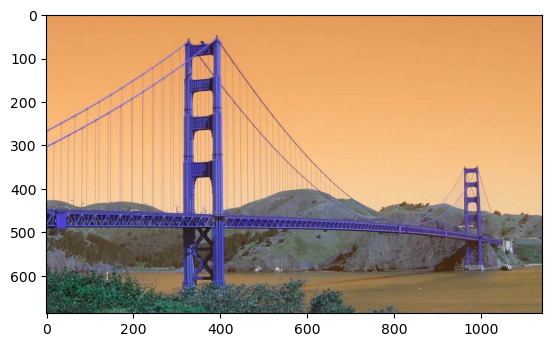

In [3]:
plt.imshow(img)

#### Converting the Image to RGB from BGR

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

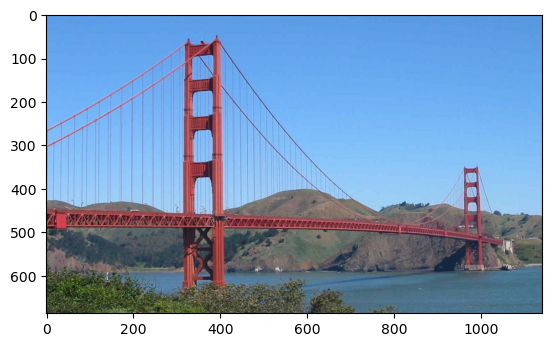

In [5]:
plt.imshow(img_rgb)
plt.show()

In [6]:
img_rgb.shape

(687, 1142, 3)

In [7]:
#img_rgb = img_rgb.astype(float) / 255.0

In [8]:
#plt.imshow(img_rgb)

#### Reshaping into 2D array and normalisation

In [9]:
rows, cols = img_rgb.shape[0], img_rgb.shape[1]
image=img_rgb.reshape(rows * cols, 3)

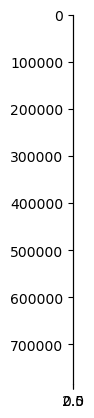

In [10]:
plt.imshow(image)

- We reshape the 3D RGB image array into a 2D array where each row represents a pixel and each column represents the Red, Green, and Blue color channels of that pixel.
- Reshaping the image into a 2D array is necessary because many clustering algorithms, including K-Means, operate on flat arrays rather than multi-dimensional arrays like images

In [11]:
image.shape

(784554, 3)

In [12]:
image[:5]

array([[ 94, 156, 229],
       [ 94, 156, 229],
       [ 94, 156, 229],
       [ 94, 156, 229],
       [ 94, 156, 229]], dtype=uint8)

#### Defining different values of K to experiment

In [15]:
k_values=[4,8,16,24,32] # Creating an array of the possible values of k for k_means

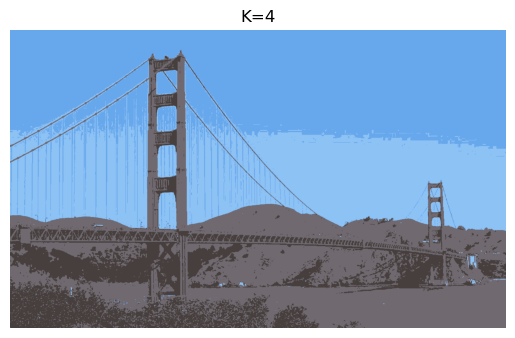

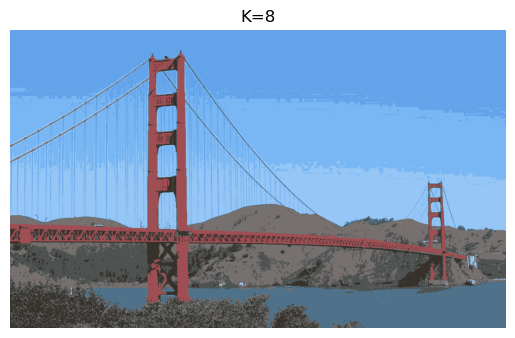

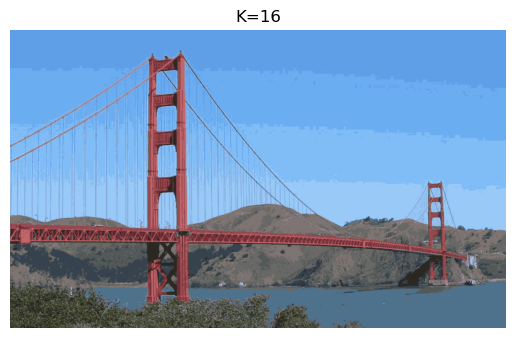

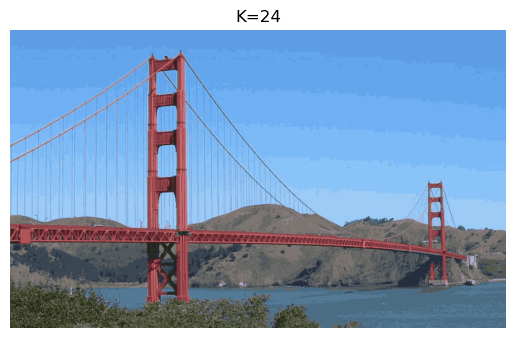

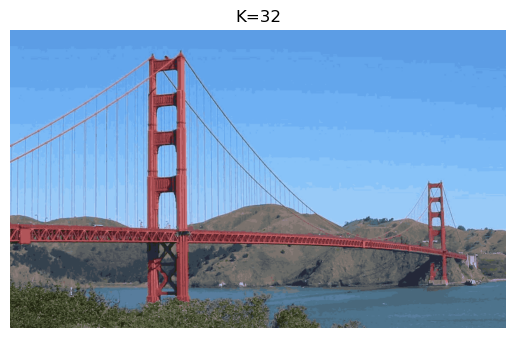

In [16]:
for k in k_values:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(image)
    
    # Extract centers and labels
    centers = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
    labels = np.asarray(kmeans.labels_, dtype=np.uint8)
    labels = np.reshape(labels, (rows, cols))
    
    # Reconstruct the compressed image 
    new_image = np.zeros((rows, cols, 3), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            new_image[i, j, :] = centers[labels[i, j], :]
    
    # Display the compressed image
    plt.figure()
    plt.imshow(new_image)
    plt.title('K={}'.format(k))
    plt.axis('off')

plt.show()

- In the context of K-means centers represent the centroids found by the k-means algorithm. These cluster centers represent the average color of the pixels assigned to each cluster. 
- Labels represent the cluster assignment for each pixel in the original image.Each pixel is assigned to the cluster whose center is closest to it in terms of Euclidean distance. 

-  Visual inspection of the compressed images demonstrate that the compressed image obtained with k=16 maintains satisfactory visual quality while achieving efficient compression by maintaining the minimal loss of information